In [2]:
#airline sentiment analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [12]:
#Using OOPs concept to train the model, reading data for training, and implement inference class

class SentimentAnalysis:
    def __init__(self):
        self.data = pd.read_csv('airline_sentiment_analysis.csv')
        self.data = self.data[['text', 'airline_sentiment']]
        self.data['airline_sentiment'] = self.data['airline_sentiment'].replace(['negative','positive'], [0, 1])
        self.data['text'] = self.data['text'].apply(self.clean_text)
        self.X = self.data['text']
        self.y = self.data['airline_sentiment']
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)
        self.count_vectorizer = CountVectorizer()
        self.X_train = self.count_vectorizer.fit_transform(self.X_train)
        self.X_test = self.count_vectorizer.transform(self.X_test)
        self.model = None
        self.y_pred = None
        self.accuracy = None
        self.confusion_matrix = None
        self.classification_report = None

    def clean_text(self, text):
        text = text.lower()
        text = re.sub(r'@\w+', '', text)
        text = re.sub(r'#\w+', '', text)
        text = re.sub(r'https?:\/\/\S+', '', text)
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = re.sub(r'\s+', ' ', text)
        text = text.strip()
        return text

    def train_model(self, model):
        self.model = model
        self.model.fit(self.X_train, self.y_train)
        self.y_pred = self.model.predict(self.X_test)
        self.accuracy = accuracy_score(self.y_test, self.y_pred)
        self.confusion_matrix = confusion_matrix(self.y_test, self.y_pred)
        self.classification_report = classification_report(self.y_test, self.y_pred)

    def get_accuracy(self):
        return self.accuracy

    def get_confusion_matrix(self):
        return self.confusion_matrix

    def get_classification_report(self):
        return self.classification_report

    def predict(self, text):
        text = self.clean_text(text)
        text = self.count_vectorizer.transform([text])
        return self.model.predict(text)
    
    def get_model(self):
        return self.model
    
    def get_count_vectorizer(self):
        return self.count_vectorizer

    def train_model(self, model):
        self.model = model
        self.model.fit(self.X_train, self.y_train)
        self.y_pred = self.model.predict(self.X_test)
        self.accuracy = accuracy_score(self.y_test, self.y_pred)
        self.confusion_matrix = confusion_matrix(self.y_test, self.y_pred)
        self.classification_report = classification_report(self.y_test, self.y_pred)


    

In [13]:
sentiment_classifier = SentimentAnalysis()

#Training the model using different algorithms

#Naive Bayes
sentiment_classifier.train_model(MultinomialNB())
print('Naive Bayes')
print('Accuracy: ', sentiment_classifier.get_accuracy()*100)
print('Confusion Matrix: ', sentiment_classifier.get_confusion_matrix())
print('Classification Report: ', sentiment_classifier.get_classification_report())





Naive Bayes
Accuracy:  91.2949328713729
Confusion Matrix:  [[1834   28]
 [ 173  274]]
Classification Report:                precision    recall  f1-score   support

           0       0.91      0.98      0.95      1862
           1       0.91      0.61      0.73       447

    accuracy                           0.91      2309
   macro avg       0.91      0.80      0.84      2309
weighted avg       0.91      0.91      0.91      2309



In [14]:
models = [LogisticRegression(), SVC(), RandomForestClassifier(), DecisionTreeClassifier(), KNeighborsClassifier()]
for model in models:
    sentiment_classifier.train_model(model)
    print('Model: ', model)
    print('Accuracy: ', sentiment_classifier.get_accuracy()*100)
    print('Confusion Matrix: ', sentiment_classifier.get_confusion_matrix())
    print('Classification Report: ', sentiment_classifier.get_classification_report())

Model:  LogisticRegression()
Accuracy:  91.85794716327415
Confusion Matrix:  [[1801   61]
 [ 127  320]]
Classification Report:                precision    recall  f1-score   support

           0       0.93      0.97      0.95      1862
           1       0.84      0.72      0.77       447

    accuracy                           0.92      2309
   macro avg       0.89      0.84      0.86      2309
weighted avg       0.92      0.92      0.92      2309

Model:  SVC()
Accuracy:  90.51537462104807
Confusion Matrix:  [[1827   35]
 [ 184  263]]
Classification Report:                precision    recall  f1-score   support

           0       0.91      0.98      0.94      1862
           1       0.88      0.59      0.71       447

    accuracy                           0.91      2309
   macro avg       0.90      0.78      0.82      2309
weighted avg       0.90      0.91      0.90      2309

Model:  RandomForestClassifier()
Accuracy:  89.99566912083154
Confusion Matrix:  [[1842   20]
 [ 211  236

In [15]:

#save the models
import pickle
pickle.dump(sentiment_classifier.get_model(), open('model.pkl', 'wb'))
pickle.dump(sentiment_classifier.get_count_vectorizer(), open('count_vectorizer.pkl', 'wb'))



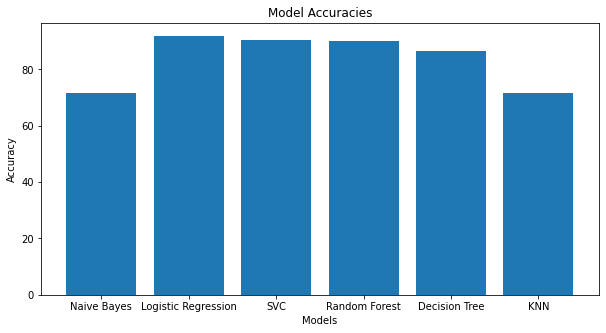

In [16]:
#Plotting accuracy of different models

model_names = ['Naive Bayes', 'Logistic Regression', 'SVC', 'Random Forest', 'Decision Tree', 'KNN']
model_accuracies = [sentiment_classifier.get_accuracy()*100]
for model in models:
    sentiment_classifier.train_model(model)
    model_accuracies.append(sentiment_classifier.get_accuracy()*100)

plt.figure(figsize=(10, 5))
plt.bar(model_names, model_accuracies)
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()


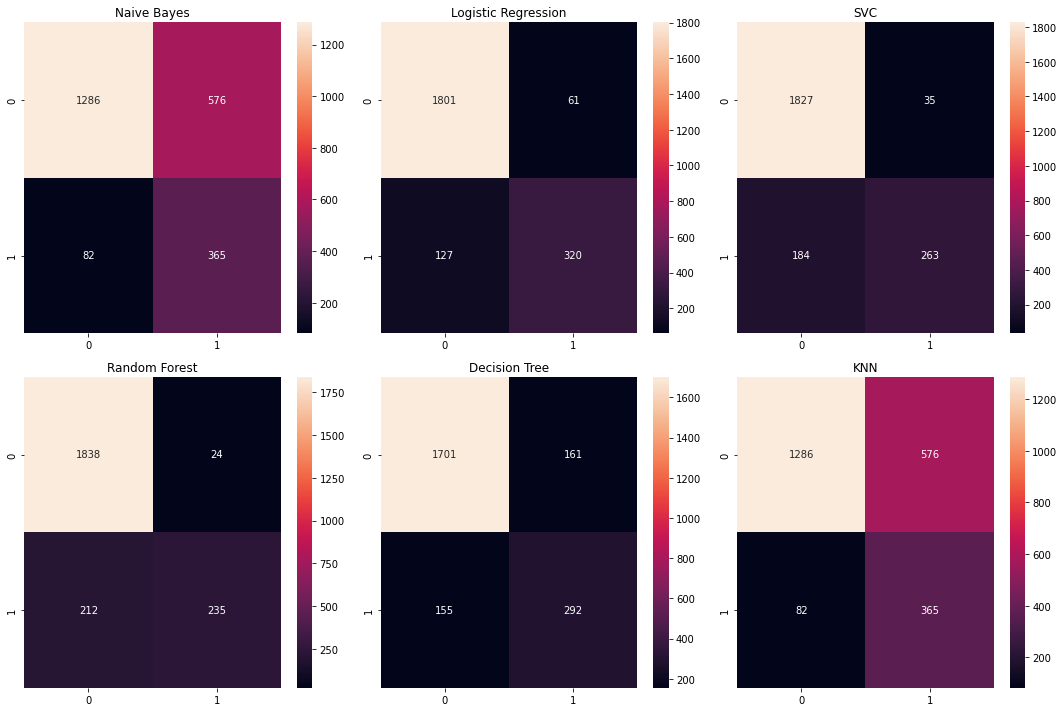

In [17]:
#Plotting confusion matrix of different models
model_confusion_matrices = [sentiment_classifier.get_confusion_matrix()]
for model in models:
    sentiment_classifier.train_model(model)
    model_confusion_matrices.append(sentiment_classifier.get_confusion_matrix())

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for i, cm in enumerate(model_confusion_matrices):
    axes[i].set_title(model_names[i])
    sns.heatmap(cm, annot=True, ax=axes[i], fmt='d')

plt.tight_layout()
plt.show()


In [28]:
#grid search for hyperparameter tuning

#importing libraries
from sklearn.model_selection import GridSearchCV

#Logistic Regression
parameters = {'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(LogisticRegression(), parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(sentiment_classifier.X_train, sentiment_classifier.y_train)
print('Best Parameters: ', grid_search.best_params_)
print('Best Score: ', grid_search.best_score_)
print('Best Estimator: ', grid_search.best_estimator_)
best_model = grid_search.best_estimator_
sentiment_classifier.train_model(best_model)
print('Accuracy: ', sentiment_classifier.get_accuracy()*100)
print('Confusion Matrix: ', sentiment_classifier.get_confusion_matrix())
print('Classification Report: ', sentiment_classifier.get_classification_report())


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters:  {'C': 1, 'penalty': 'l2'}
Best Score:  0.9180017257348597
Best Estimator:  LogisticRegression(C=1)
Accuracy:  91.85794716327415
Confusion Matrix:  [[1801   61]
 [ 127  320]]
Classification Report:                precision    recall  f1-score   support

           0       0.93      0.97      0.95      1862
           1       0.84      0.72      0.77       447

    accuracy                           0.92      2309
   macro avg       0.89      0.84      0.86      2309
weighted avg       0.92      0.92      0.92      2309



In [19]:

#SVC
parameters = {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(sentiment_classifier.X_train, sentiment_classifier.y_train)
print('Best Parameters: ', grid_search.best_params_)
print('Best Score: ', grid_search.best_score_)
print('Best Estimator: ', grid_search.best_estimator_)
best_model = grid_search.best_estimator_
sentiment_classifier.train_model(best_model)
print('Accuracy: ', sentiment_classifier.get_accuracy()*100)
print('Confusion Matrix: ', sentiment_classifier.get_confusion_matrix())
print('Classification Report: ', sentiment_classifier.get_classification_report())


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters:  {'C': 0.1, 'kernel': 'linear'}
Best Score:  0.9157271813798957
Best Estimator:  SVC(C=0.1, kernel='linear')
Accuracy:  91.38155045474231
Confusion Matrix:  [[1808   54]
 [ 145  302]]
Classification Report:                precision    recall  f1-score   support

           0       0.93      0.97      0.95      1862
           1       0.85      0.68      0.75       447

    accuracy                           0.91      2309
   macro avg       0.89      0.82      0.85      2309
weighted avg       0.91      0.91      0.91      2309



In [20]:
#Naive Bayes
parameters = {'alpha': [0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(MultinomialNB(), parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(sentiment_classifier.X_train, sentiment_classifier.y_train)
print('Best Parameters: ', grid_search.best_params_)
print('Best Score: ', grid_search.best_score_)
print('Best Estimator: ', grid_search.best_estimator_)
best_model = grid_search.best_estimator_
sentiment_classifier.train_model(best_model)
print('Accuracy: ', sentiment_classifier.get_accuracy()*100)
print('Confusion Matrix: ', sentiment_classifier.get_confusion_matrix())
print('Classification Report: ', sentiment_classifier.get_classification_report())



Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters:  {'alpha': 0.1}
Best Score:  0.9002368632686544
Best Estimator:  MultinomialNB(alpha=0.1)
Accuracy:  90.68860978778692
Confusion Matrix:  [[1787   75]
 [ 140  307]]
Classification Report:                precision    recall  f1-score   support

           0       0.93      0.96      0.94      1862
           1       0.80      0.69      0.74       447

    accuracy                           0.91      2309
   macro avg       0.87      0.82      0.84      2309
weighted avg       0.90      0.91      0.90      2309



In [22]:
#Random Forest
parameters = {'n_estimators': [100, 200, 300, 400, 500], 'criterion': ['gini', 'entropy']}
grid_search = GridSearchCV(RandomForestClassifier(), parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(sentiment_classifier.X_train, sentiment_classifier.y_train)
print('Best Parameters: ', grid_search.best_params_)
print('Best Score: ', grid_search.best_score_)
print('Best Estimator: ', grid_search.best_estimator_)
best_model = grid_search.best_estimator_
sentiment_classifier.train_model(best_model)
print('Accuracy: ', sentiment_classifier.get_accuracy()*100)
print('Confusion Matrix: ', sentiment_classifier.get_confusion_matrix())
print('Classification Report: ', sentiment_classifier.get_classification_report())


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters:  {'criterion': 'gini', 'n_estimators': 300}
Best Score:  0.8915721726133737
Best Estimator:  RandomForestClassifier(n_estimators=300)
Accuracy:  89.95236032914681
Confusion Matrix:  [[1842   20]
 [ 212  235]]
Classification Report:                precision    recall  f1-score   support

           0       0.90      0.99      0.94      1862
           1       0.92      0.53      0.67       447

    accuracy                           0.90      2309
   macro avg       0.91      0.76      0.81      2309
weighted avg       0.90      0.90      0.89      2309



In [23]:
#decision tree
parameters = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random']}
grid_search = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(sentiment_classifier.X_train, sentiment_classifier.y_train)
print('Best Parameters: ', grid_search.best_params_)
print('Best Score: ', grid_search.best_score_)
print('Best Estimator: ', grid_search.best_estimator_)
best_model = grid_search.best_estimator_
sentiment_classifier.train_model(best_model)
print('Accuracy: ', sentiment_classifier.get_accuracy()*100)
print('Confusion Matrix: ', sentiment_classifier.get_confusion_matrix())
print('Classification Report: ', sentiment_classifier.get_classification_report())

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters:  {'criterion': 'gini', 'splitter': 'best'}
Best Score:  0.8659004880978849
Best Estimator:  DecisionTreeClassifier()
Accuracy:  86.74750974447812
Confusion Matrix:  [[1710  152]
 [ 154  293]]
Classification Report:                precision    recall  f1-score   support

           0       0.92      0.92      0.92      1862
           1       0.66      0.66      0.66       447

    accuracy                           0.87      2309
   macro avg       0.79      0.79      0.79      2309
weighted avg       0.87      0.87      0.87      2309



In [24]:
#KNN
parameters = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21], 'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(sentiment_classifier.X_train, sentiment_classifier.y_train)
print('Best Parameters: ', grid_search.best_params_)
print('Best Score: ', grid_search.best_score_)
print('Best Estimator: ', grid_search.best_estimator_)
best_model = grid_search.best_estimator_
sentiment_classifier.train_model(best_model)
print('Accuracy: ', sentiment_classifier.get_accuracy()*100)
print('Confusion Matrix: ', sentiment_classifier.get_confusion_matrix())
print('Classification Report: ', sentiment_classifier.get_classification_report())


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters:  {'n_neighbors': 5, 'weights': 'distance'}
Best Score:  0.7006039485423641
Best Estimator:  KNeighborsClassifier(weights='distance')
Accuracy:  71.71935902988307
Confusion Matrix:  [[1291  571]
 [  82  365]]
Classification Report:                precision    recall  f1-score   support

           0       0.94      0.69      0.80      1862
           1       0.39      0.82      0.53       447

    accuracy                           0.72      2309
   macro avg       0.67      0.75      0.66      2309
weighted avg       0.83      0.72      0.75      2309



The best model is Logistic Regression

In [29]:
best_model

LogisticRegression(C=1)

In [30]:
#saving the model
import pickle
pickle.dump(best_model, open('sentiment_classifier.pkl', 'wb'))

In [31]:
#loading the model
model = pickle.load(open('sentiment_classifier.pkl', 'rb'))

#testing the model
print(model.predict(sentiment_classifier.X_test))


[0 1 0 ... 0 0 0]


In [40]:
#saving the vectorizer
pickle.dump(sentiment_classifier.count_vectorizer, open('vectorizer.pkl', 'wb'))


In [4]:

#loading the vectorizer
import pickle
vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))
model = pickle.load(open('sentiment_classifier.pkl', 'rb'))

In [43]:
#testing the model with new data
new_review = ['I love this flight']
new_review = vectorizer.transform(new_review)
print(model.predict(new_review))


[1]


In [46]:
def get_sentiment(review):
    new_review = [review]
    new_review = vectorizer.transform(new_review)
    pred = model.predict(new_review)
    if pred == 1:
        return 'Positive'
    else:
        return 'Negative'

print(get_sentiment('I love this flight❤️'))
print(get_sentiment('I hate this flight😡'))

Positive
Negative


In [5]:
class Inference:
    def __init__(self, model, vectorizer):
        self.model = model
        self.vectorizer = vectorizer

    def get_sentiment(self, review):
        new_review = [review]
        new_review = self.vectorizer.transform(new_review)
        pred = self.model.predict(new_review)
        if pred == 1:
            return 'Positive'
        else:
            return 'Negative'

inference = Inference(model, vectorizer)
print(inference.get_sentiment('I love this flight❤️'))
print(inference.get_sentiment('I hate this flight😡'))

Positive
Negative
